In [25]:
using HarmonicBalance,Latexify,PyPlot

## Arnold tongue of a single parametron

In [ ]:
@variables ω₁, ω, γ,λ, t, T, α₁, x(t)

#sympy object for the equation of motion
natural_equation = [d(d(x, t),t) + ω₁^2*(1-λ*cos(2*ω*t)) * x + γ*d(x,t)  + α₁*x^3] 

dEOM = DifferentialEquation(natural_equation, x)

HarmonicBalance.add_harmonic!(dEOM, x, ω) # x will rotate at ω

@time averagedEOM = get_harmonic_equations(dEOM, slow_time=T, fast_time=t)
@time problem = Problem(averagedEOM)

# 1D sweep

In [27]:
fixed_parameters =  ([(ω₁, 1.),(γ, 0.001 ),(α₁,  -1.),(λ,0.05)])
swept_parameters = ω =>LinRange(0.7,1.2,50)

soln_1d = HarmonicBalance.get_steady_states(problem, swept_parameters, fixed_parameters; random_warmup=false, threading=false,sorting="nearest");

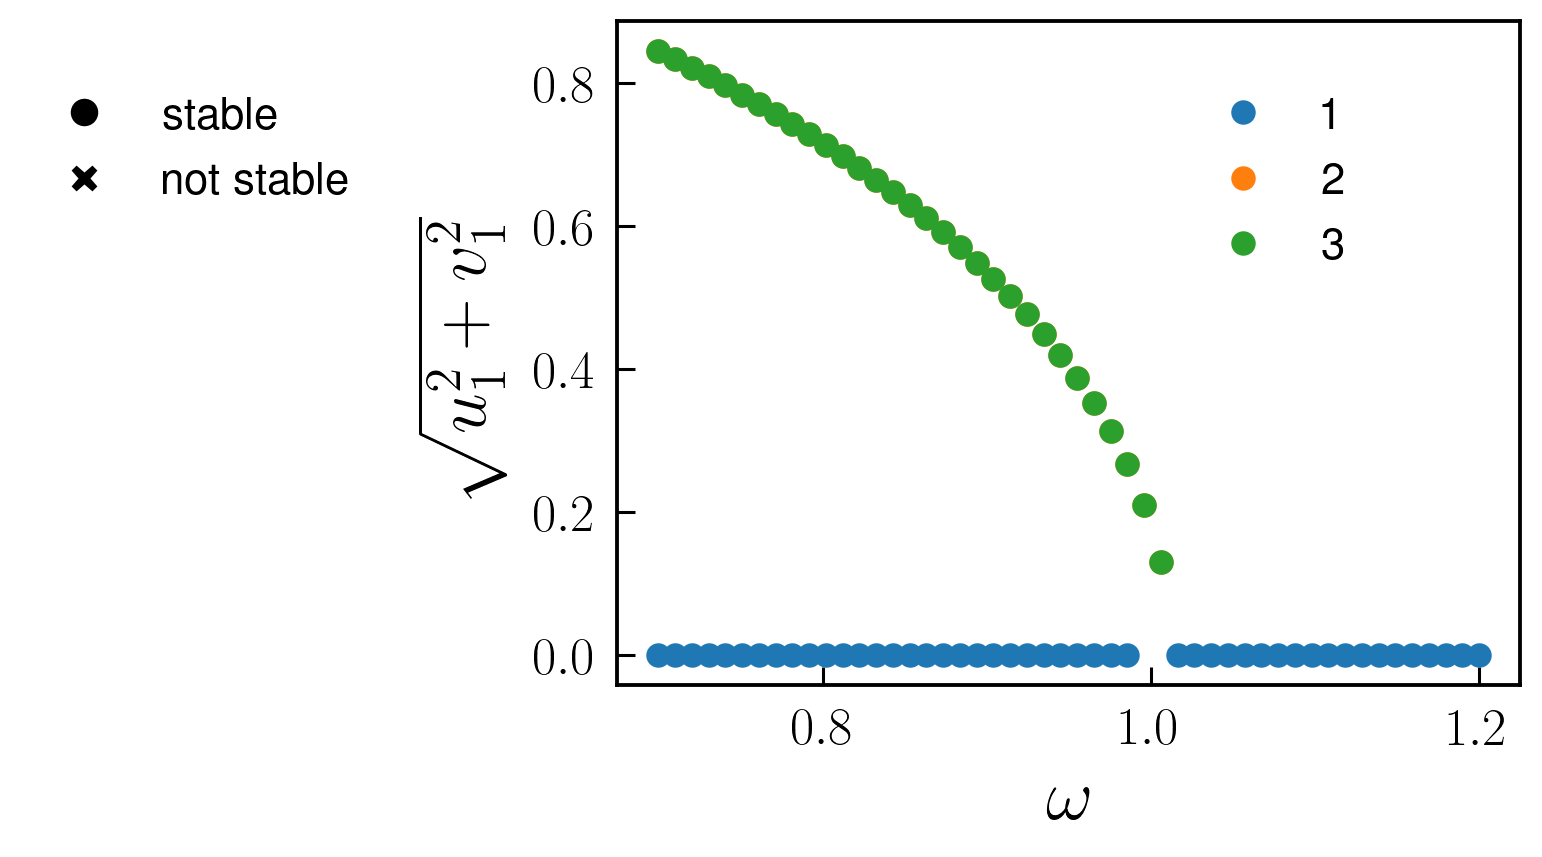

In [29]:
lines = HarmonicBalance.plot_1D_solutions(soln_1d, x="ω", y="sqrt(u1^2 + v1^2)", plot_only=["physical","stable"])#,filename="plot_1D");

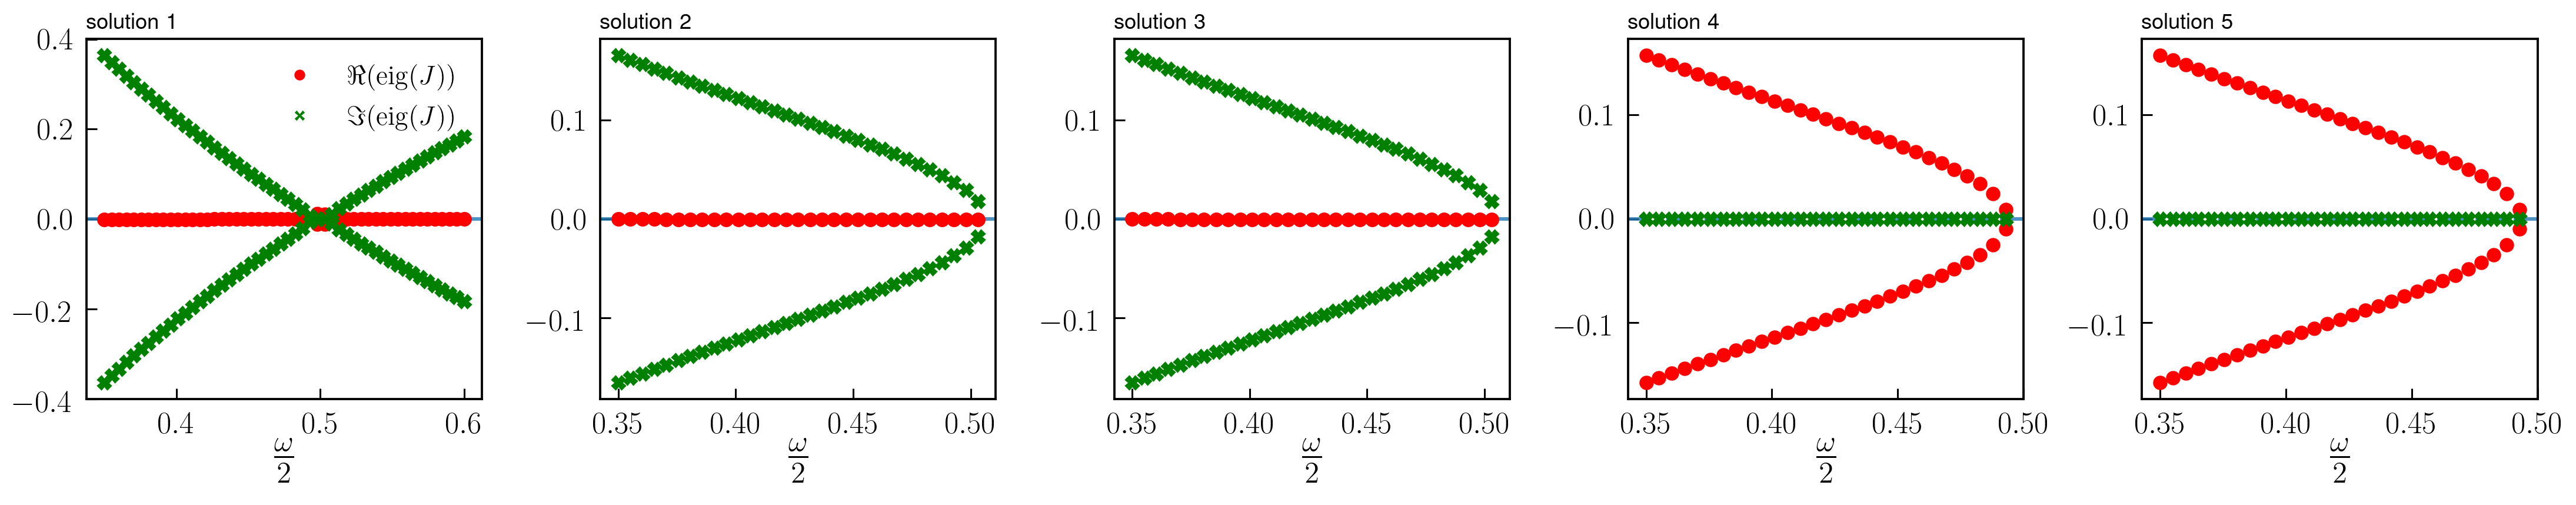

In [30]:
f,ax = HarmonicBalance.subplots(1,5,figsize=(4*5,4))
HarmonicBalance.plot_1D_jacobian_eigenvalues(soln_1d, x="ω/2", physical=true, stable=false,filename="plot_1D_jacobian",ax=ax);

# single parametron, 2D sweeps

In [31]:
fixed_parameters = ([(ω₁, 1.),(γ, 0.05),(α₁, -0.99)])

swept_parameters = (ω => collect(LinRange(0.8,1.2,100)), λ => collect(LinRange(0.001,0.6,120)))

#best results for random_warmup=false, so beginning from a total degree homotopy and pass parameters one by one to the solver
phase_diagram = HarmonicBalance.get_steady_states(problem, swept_parameters, fixed_parameters; random_warmup=false, threading=false,sorting="nearest")

A steady state result for 12000 parameter points

Solution branches:   5
   of which real:    5
   of which stable:  3

Classes: stable, physical, Hopf, binary_labels


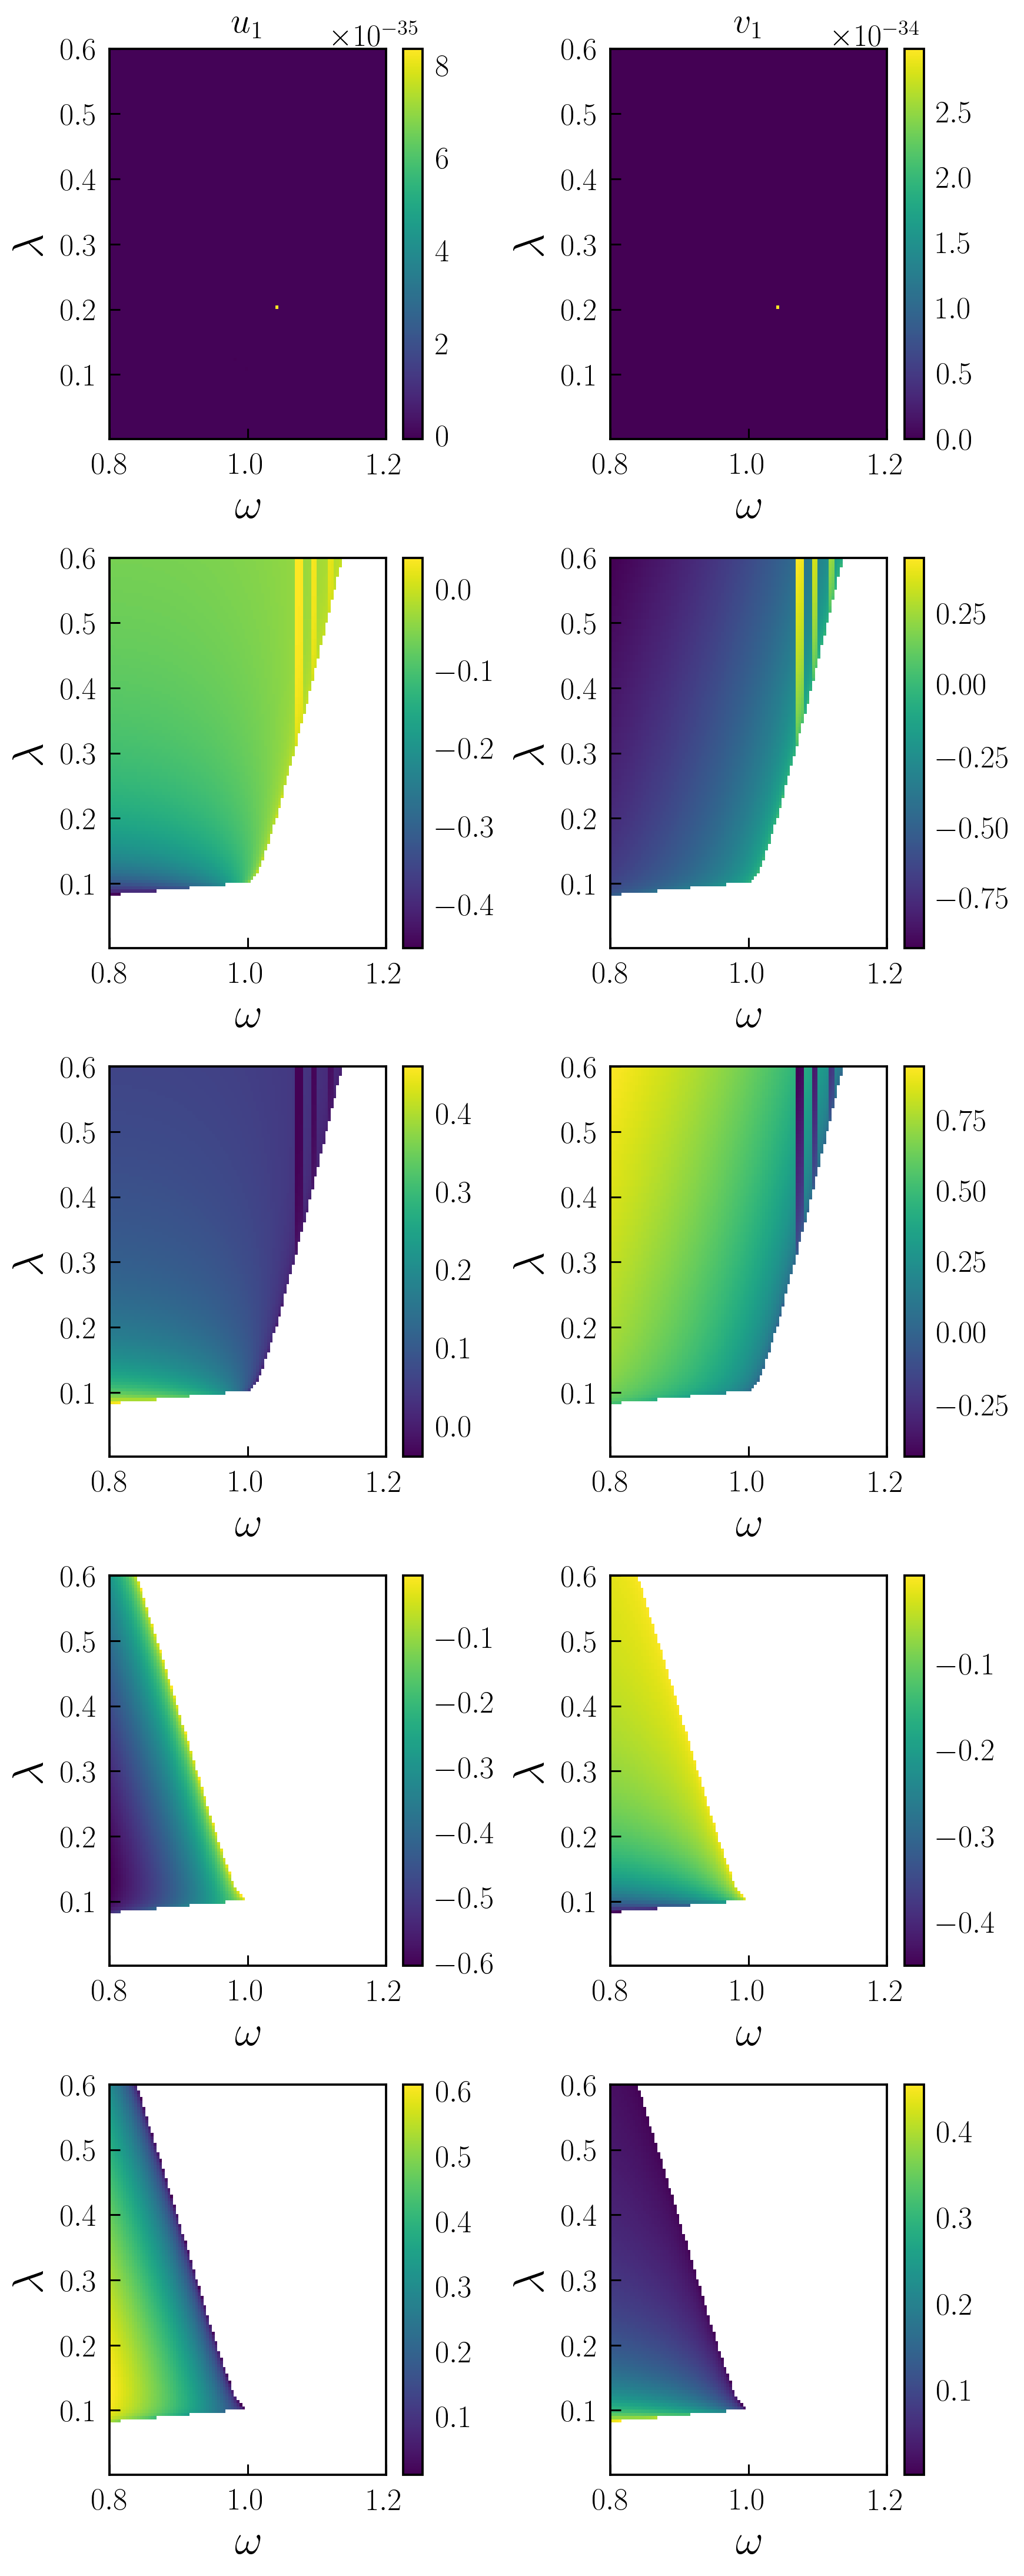

In [32]:
HarmonicBalance.plot_2D_solutions(phase_diagram,filename="plot_2D_solutions")

In [33]:
data_2D = JLD2.load("plot_2D_solutions.jld2")
data_2D["panel (2,2)"]

LoadError: UndefVarError: JLD2 not defined

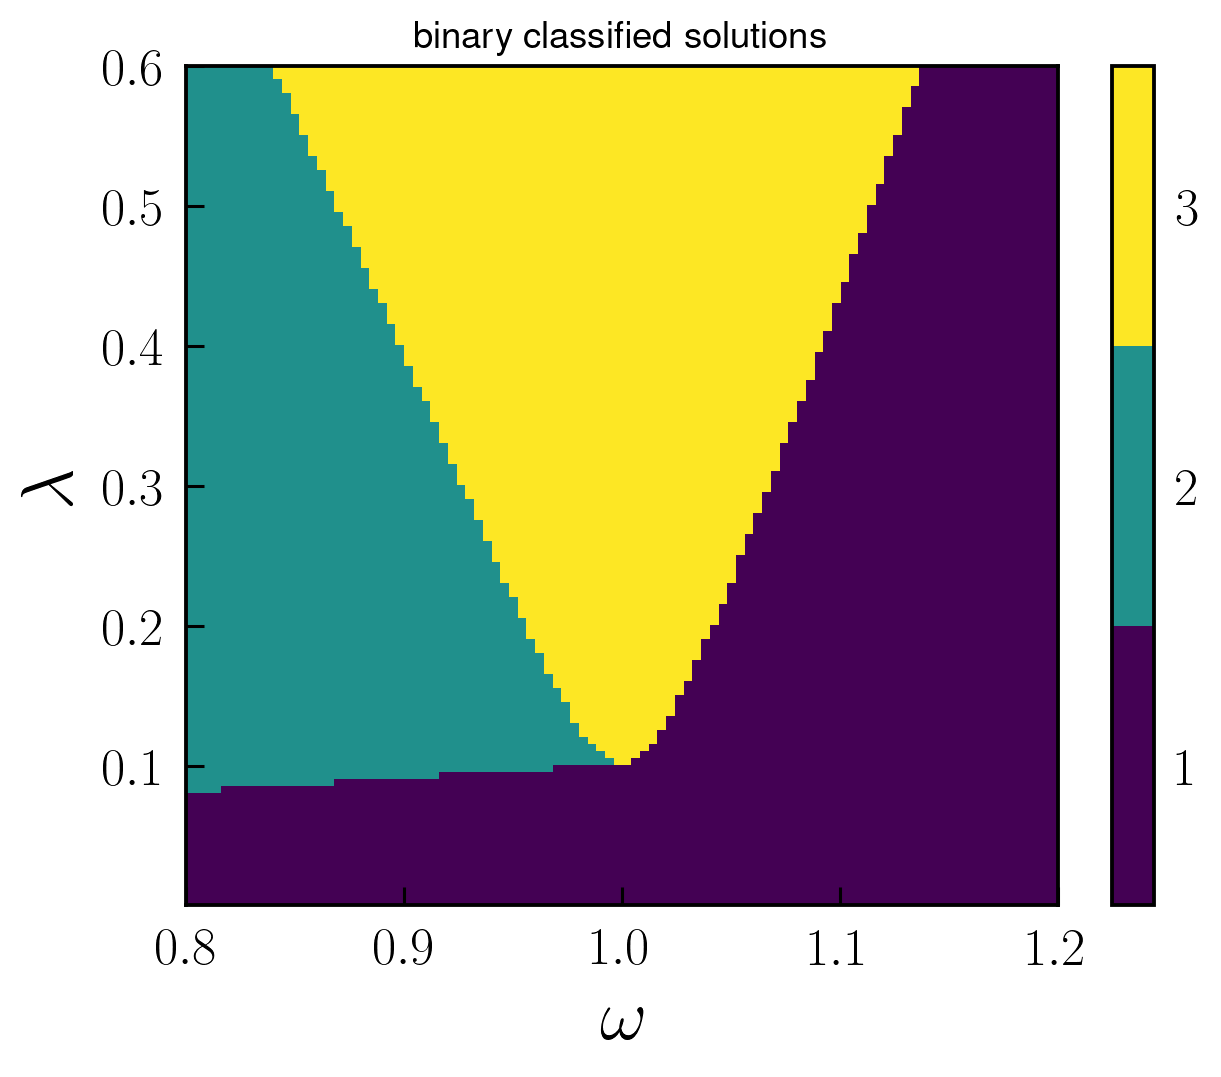

(PyObject <matplotlib.image.AxesImage object at 0x7fac48f76a90>, 3)

In [34]:
HarmonicBalance.plot_2D_phase_diagram(phase_diagram, stable=false,observable="binary",filename="plot_2D_phase_diagram")

In [36]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(phase_diagram, stable=true, nrows=2,ncols=2,cut_dim="2",cut_type="solutions",observable="nsols",marker_classification="ω^15* sqrt(u1^2 + v1^2) < 0.1" )

PyObject <matplotlib.colorbar.Colorbar object at 0x7fac4831bc10>

In [37]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(phase_diagram, stable=true, nrows=1,cut_dim="1",cut_type="transform",observable="binary",string_f=["u1^2+v1^2"])

/usr/lib/python3.8/tkinter/__init__.py:814: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args)
/usr/lib/python3.8/tkinter/__init__.py:1892: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  return self.func(*args)
/usr/lib/python3.8/tkinter/__init__.py:1892: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  return self.func(*args)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3.8/tkinter/__init__.py:814: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args)
/usr/lib/python3.8/tkinter/__init__.py:814: UserWarning: Tight layout not applied. ti

PyObject <matplotlib.colorbar.Colorbar object at 0x7fac481d8af0>

In [38]:
HarmonicBalance.plot_2D_phase_diagram(phase_diagram, stable=false,observable="nsols")

(PyObject <matplotlib.image.AxesImage object at 0x7fac480cfac0>, 5)

In [47]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(phase_diagram, stable=true, nrows=2,ncols=2,cut_dim="1",cut_type="solutions")

PyObject <matplotlib.colorbar.Colorbar object at 0x7fac4838d2b0>

In [40]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(phase_diagram, stable=false, nrows=4,cut_dim="1",cut_type="jacobian_eigenvalues")

PyObject <matplotlib.colorbar.Colorbar object at 0x7fac4d0a7c40>

# coupled parametrons

In [41]:
@variables x, y, ω₁, ω₂,ω, γ,λ, t, T, ω, α₁, α₂, J;
@variables x(t), y(t);

In [42]:
#sympy object for the equation of motion
natural_equation = [d(d(x, t),t) + ω₁^2*(1-λ*cos(2*ω*t)) * x + γ*d(x,t)  + α₁*x^3 - J*y , 
                    d(d(y,t),t)  + ω₂^2*(1-λ*cos(2*ω*t)) * y + γ*d(y,t)  + α₂*y^3 - J*x] 


dEOM_coupled = HarmonicBalance.DifferentialEquation(natural_equation, [x, y])

HarmonicBalance.add_harmonic!(dEOM_coupled, x, ω) # x will rotate at ω
HarmonicBalance.add_harmonic!(dEOM_coupled, y, ω) # y will rotate at ω

show(dEOM_coupled)

@time averagedEOM_coupled = HarmonicBalance.get_harmonic_equations(dEOM_coupled, slow_time=T, fast_time=t)
@time problem_coupled = HarmonicBalance.Problem(averagedEOM_coupled)

"equations"

OrderedCollections.OrderedDict{Symbolics.Num, Symbolics.Equation} with 2 entries:
  x(t) => α₁*(x(t)^3) + γ*Differential(t)(x(t)) + (ω₁^2)*(1 - λ*cos(2t*ω))*x(t)…
  y(t) => α₂*(y(t)^3) + γ*Differential(t)(y(t)) + (ω₂^2)*(1 - λ*cos(2t*ω))*y(t)…

"harmonics"

OrderedCollections.OrderedDict{Symbolics.Num, Vector{Symbolics.Num}} with 2 entries:
  x(t) => [ω]
  y(t) => [ω]

  1.487019 seconds (2.24 M allocations: 106.779 MiB, 75.43% compilation time)
  0.056136 seconds (130.01 k allocations: 4.798 MiB, 0.00% compilation time)


4 algebraic equations for steady states
Variables: u1, v1, u2, v2
Parameters: α₁, ω, γ, J, ω₁, λ, α₂, ω₂
Symbolic Jacobian: true


# 2D phase diagram for two coupled parametrons

In [43]:
fixed_parameters = ([(ω₁, 1.),( ω₂, 1. ),(γ, 0.001 ),(α₁,  -0.01),(α₂, -0.01),(J,0.)])
swept_parameters = (ω => LinRange(0.,1.5, 100), λ => LinRange(0.001,0.6, 100))
result_coupled = HarmonicBalance.get_steady_states(problem_coupled, swept_parameters, fixed_parameters; random_warmup=true, threading=false)

Solving for 10000 parameters... 100%|███████████████████| Time: 0:00:29
  # parameters solved:  10000
  # paths tracked:      250000


A steady state result for 10000 parameter points

Solution branches:   25
   of which real:    25
   of which stable:  18

Classes: stable, physical, Hopf, binary_labels


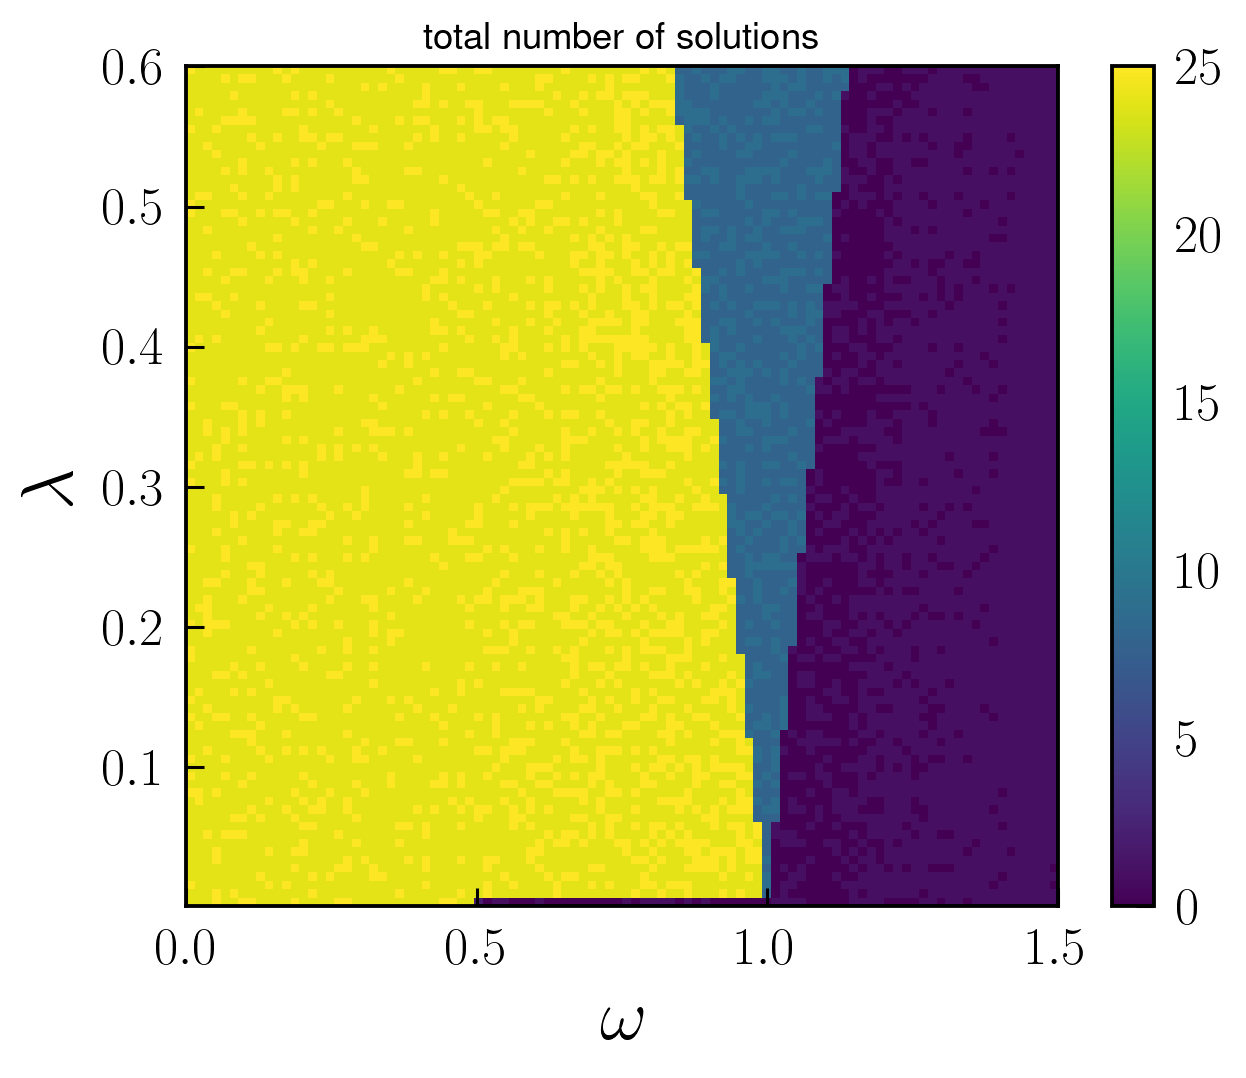

In [44]:
HarmonicBalance.plot_2D_phase_diagram(result_coupled, stable=false);

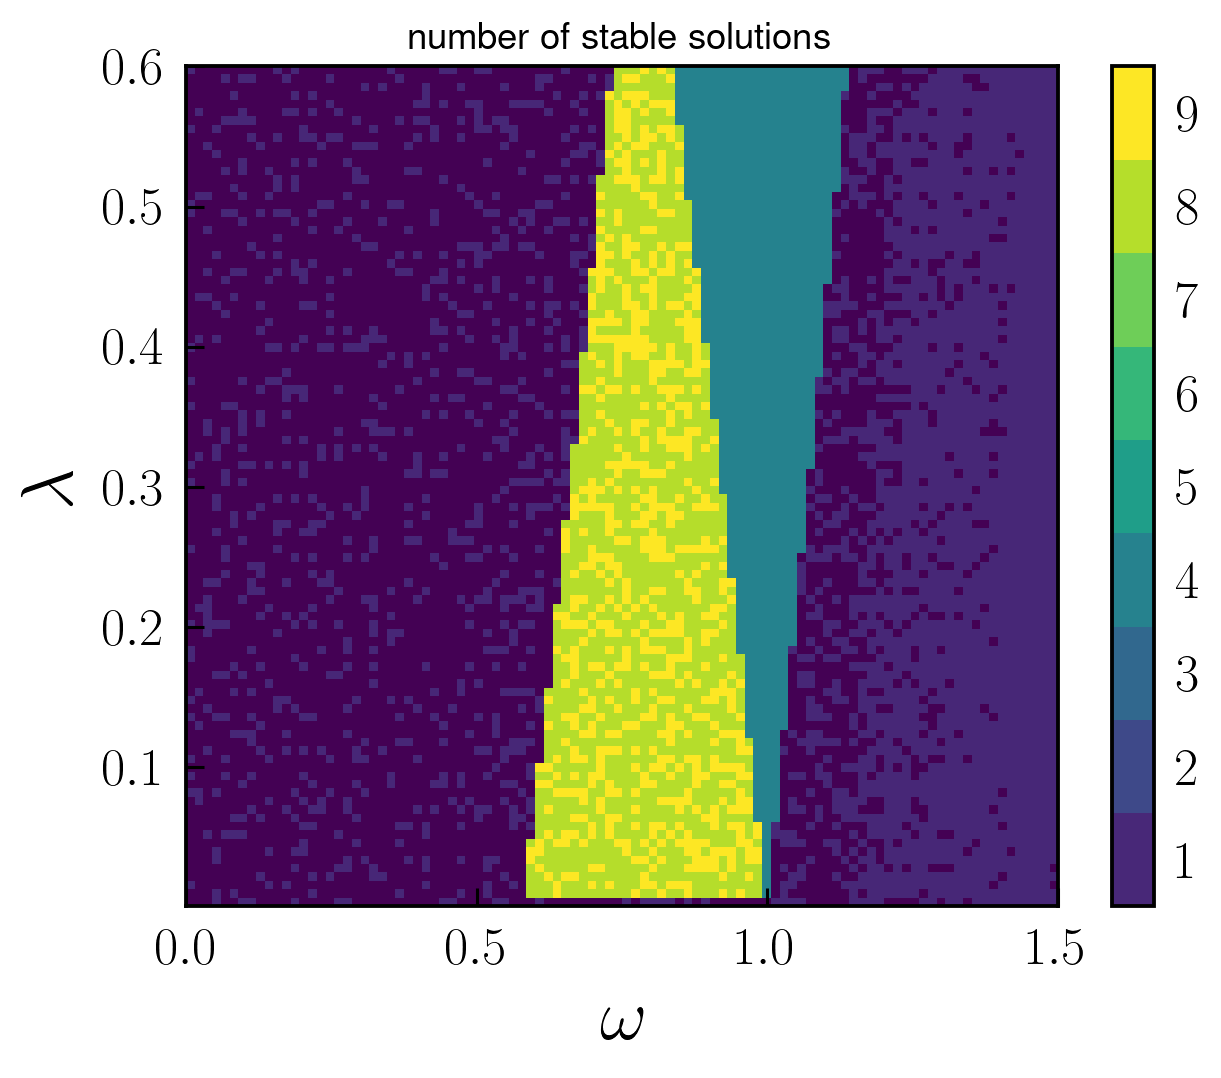

In [45]:
HarmonicBalance.plot_2D_phase_diagram(result_coupled, stable=true);

In [46]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(result_coupled, stable=false, nrows=3, ncols=3,cut_dim="1",cut_type="solutions",observable="nsols")

PyObject <matplotlib.colorbar.Colorbar object at 0x7fac33395520>